In [6]:
using LCIO
using StatsPlots
using LinearAlgebra: norm
gr()
theme(:gruvbox_dark)

We only want files that match a certain pattern. We read the whole directory (that could also contain other files), and then filter the ones that we want.

In [2]:
fileList = filter(s->occursin(r"E250_SetA.Pmumuh2ss.Gwhizard-2_84.eL0.8\.pR0.3\.0_DST.slcio", s), readdir("/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/RecoLevel", join=true))

String[]

In [3]:
fileList = filter(s->occursin(r"dump.slcio", s), readdir("/nfs/dust/ilc/user/jstrube/StrangeHiggs/data", join=true))

1-element Array{String,1}:
 "/nfs/dust/ilc/user/jstrube/StrangeHiggs/data/dump.slcio"

Let's take a look at the collections that we have in the events.

In [4]:
LCIO.open(fileList[1]) do reader
    for (iEvent, event) in enumerate(reader)
        for name in getCollectionNames(event)
            println(name)
        end
        break
    end
end

BeamCalHits
BuildUpVertices
BuildUpVertices_RP
BuildUpVertices_V0
BuildUpVertices_V0_RP
BuildUpVertices_V0_res
BuildUpVertices_V0_res_RP
BuildUpVertices_res
BuildUpVertices_res_RP
CalohitMCTruthLink
ClusterMCTruthLink
ECalBarrelDigi
ECalBarrelDigiRelation
ECalBarrelHits
ECalBarrelReco
ECalBarrelRecoRelation
ECalEndcapDigi
ECalEndcapDigiRelation
ECalEndcapHits
ECalEndcapReco
ECalEndcapRecoRelation
HCalBarrelDigi
HCalBarrelDigiRelation
HCalBarrelHits
HCalBarrelReco
HCalBarrelRecoRelation
HCalEndcapDigi
HCalEndcapDigiRelation
HCalEndcapHits
HCalEndcapReco
HCalEndcapRecoRelation
LumiCalHits
MCParticle
MUON
MuonBarrelHits
MuonEndcapHits
MuonHitRelations
PandoraClusters
PandoraPFANewStartVertices
PandoraPFOs
PrimaryVertices
PrimaryVertices_RP
PrimaryVertices_res
PrimaryVertices_res_RP
RecoMCTruthLink
RefinedVertexJets
RefinedVertexJets_rel
RefinedVertexJets_vtx
RefinedVertexJets_vtx_RP
RefinedVertices
RefinedVertices_RP
SiTrackRelations
SiTrackerBarrelHits
SiTrackerBarrelHitsPlanes
SiTracker

In [9]:
K_deltaPList = Float64[]
K_pList = Float64[]
π_deltaPList = Float64[]
π_pList = Float64[]

for FILENAME in fileList
    LCIO.open(FILENAME) do reader
        for (iEvent, event) in enumerate(reader)
            rp = getCollection(event, "PandoraPFOs")
            mcp = getCollection(event, "MCParticle")
            recoLinks = getCollection(event, "RecoMCTruthLink")
            rel=LCIO.LCRelationNavigator(recoLinks)
            for reco in rp
                mcpList = getRelatedToObjects(rel, reco)
                if length(mcpList) != 1 continue end
                mc = mcpList[1]
                reco_p = norm(getMomentum(reco))
                mc_p = norm(getMomentum(mc))
                if abs(getPDG(mc)) == 211
                    push!(π_pList, reco_p)
                    push!(π_deltaPList, mc_p - reco_p)
                elseif abs(getPDG(mc)) == 321
                    push!(K_pList, reco_p)
                    push!(K_deltaPList, mc_p - reco_p)
                end
            end
        end
    end
end

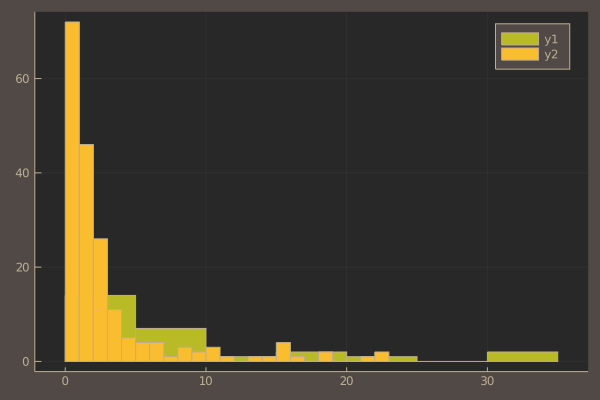

In [14]:
histogram(K_pList)
histogram!(π_pList)

In [16]:
histogram(K_deltaPList)
histogram!(π_deltaPList)

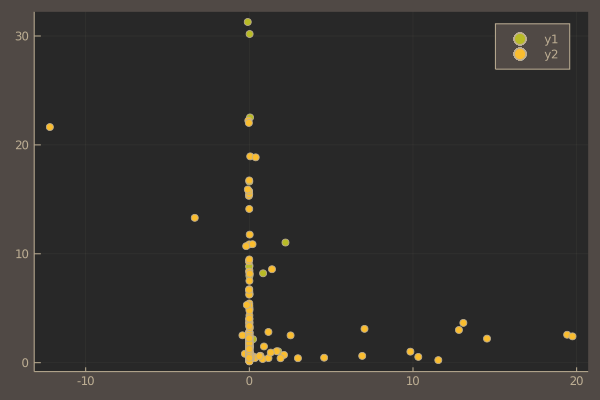

In [12]:
scatter(K_deltaPList, K_pList)
scatter!(π_deltaPList, π_pList)